In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from PIL import Image

import re, string, unicodedata
import warnings

from textblob import TextBlob, Word

from sklearn.base import TransformerMixin, BaseEstimator

import sys
sys.path.append('../../lib')

from helper_functions_2 import make_autopct, fast_mode , apply_labels 
from helper_functions_2 import MyTextTransformer, MyTextPlots

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
%matplotlib inline

In [9]:
train = pd.read_csv("data/Train.csv")
test = pd.read_csv("data/Test.csv")

train.head()

,ID,text,label
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression
1,9JDAGUV3,Why do I get hallucinations?,Drugs
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression
3,6UY7DX6Q,Why is life important?,Suicide
4,FYC0FTFB,How could I be helped to go through the depres...,Depression


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 3 columns):
ID       616 non-null object
text     616 non-null object
label    616 non-null object
dtypes: object(3)
memory usage: 14.6+ KB


In [11]:
class FeatureEngineering(BaseEstimator,TransformerMixin):
    def __init__(self, field):
        self.field = field
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X["wcount"] = X[self.field].apply(lambda x: len(x.split()))
        X["tlength"] = X[self.field].apply(lambda x: len(x))
        X["word_len"] = X["tlength"]/X["wcount"]
        
        X["polarity"] = X[self.field].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
        X["subjectivity"] = X[self.field].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)
        
        return X
    
train = FeatureEngineering("text").fit_transform(train)
test = FeatureEngineering("text").fit_transform(test)

### Exploratory Data Analysis

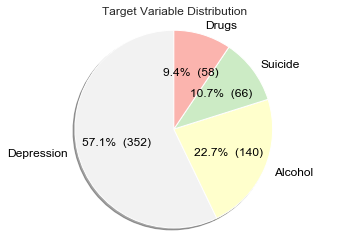

In [14]:
targets_dict = train["label"].value_counts()
cmap = plt.get_cmap('Pastel1_r')
c = [cmap(i) for i in np.linspace(0, 1, len(targets_dict.index))]
plt.pie(targets_dict.values, labels= targets_dict.index, colors= c,
        shadow= True, autopct=make_autopct(targets_dict.values, is_perc='both'),
        startangle = 90, textprops = {'color': 'black', 'fontsize': 12})
plt.axis('equal')
plt.title("Target Variable Distribution")
plt.show()

- clearly there is a class imbalance from the above chat
- most of the observations seem to be on depression

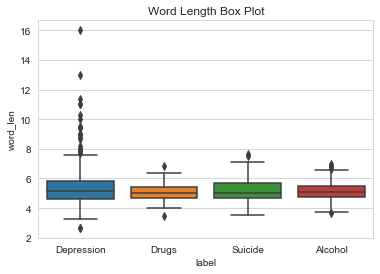

In [26]:
sns.boxplot(x="label", y="word_len", data=train)
plt.title("Word Length Box Plot")
plt.show()

Text(0.5, 1.0, 'Positive Class Avg Word Length Distribution Plot')

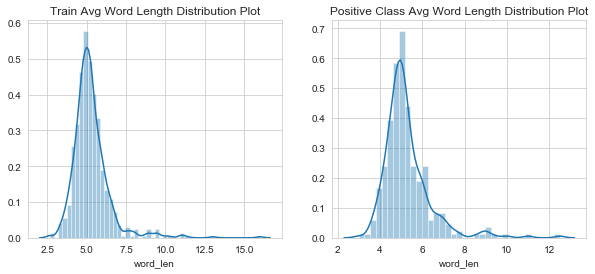

In [153]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)

sns.distplot(train.word_len)
plt.title("Train Avg Word Length Distribution Plot")

plt.subplot(1,2,2)
sns.distplot(test.word_len)
plt.title("Positive Class Avg Word Length Distribution Plot")

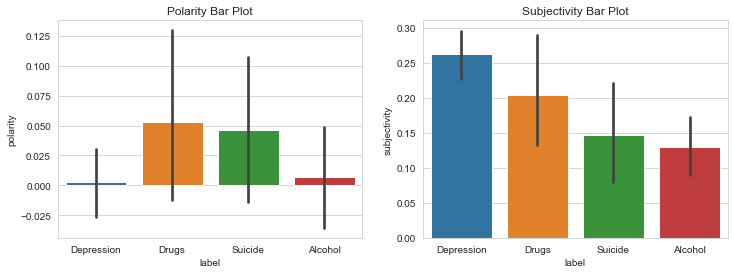

In [31]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sns.barplot(x="label", y="polarity", data=train)
plt.title("Polarity Bar Plot")
plt.subplot(1,2,2)
sns.barplot(x="label", y="subjectivity", data=train)
plt.title("Subjectivity Bar Plot")
plt.show()

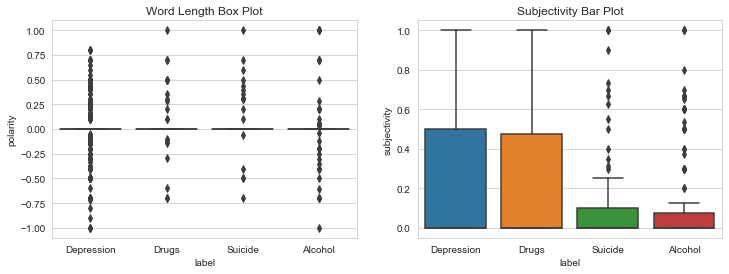

In [32]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sns.boxplot(x="label", y="polarity", data=train)
plt.title("Word Length Box Plot")
plt.subplot(1,2,2)
sns.boxplot(x="label", y="subjectivity", data=train)
plt.title("Subjectivity Bar Plot")
plt.show()

In [33]:
train.groupby("label")[["polarity","subjectivity"]].describe()

polarity                                              subjectivity  \
              count      mean       std  min  25%  50%  75%  max        count   
label                                                                           
Alcohol       140.0  0.006565  0.266515 -1.0  0.0  0.0  0.0  1.0        140.0   
Depression    352.0  0.002422  0.278272 -1.0  0.0  0.0  0.0  0.8        352.0   
Drugs          58.0  0.053130  0.285313 -0.7  0.0  0.0  0.0  1.0         58.0   
Suicide        66.0  0.046109  0.245372 -0.7  0.0  0.0  0.0  1.0         66.0   

                                                           
                mean       std  min  25%  50%    75%  max  
label                                                      
Alcohol     0.129422  0.251513  0.0  0.0  0.0  0.075  1.0  
Depression  0.262239  0.331717  0.0  0.0  0.0  0.500  1.0  
Drugs       0.204495  0.304573  0.0  0.0  0.0  0.475  1.0  
Suicide     0.146759  0.288114  0.0  0.0  0.0  0.100  1.0

#### process the text data ready for modeling

In [34]:
train["clean"] = train["text"].apply(MyTextTransformer().transform, skip_steps=['inflect'])
test["clean"] = test["text"].apply(MyTextTransformer().transform, skip_steps=['inflect'])

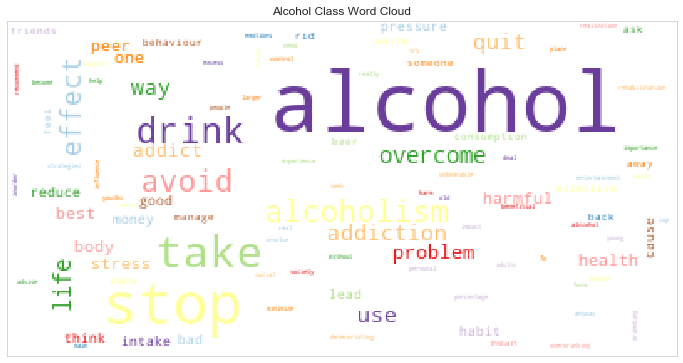

In [45]:
alcohol_class = train[train["label"] == "Alcohol"]['clean'].str.cat(sep = ",")
alcohol_word = (MyTextPlots().plot_word_cloud(alcohol_class, title='Alcohol Class Word Cloud',
                                              max_words=100, cmap='Paired', 
                                              figsize=(12, 12), savefig=True)
               )

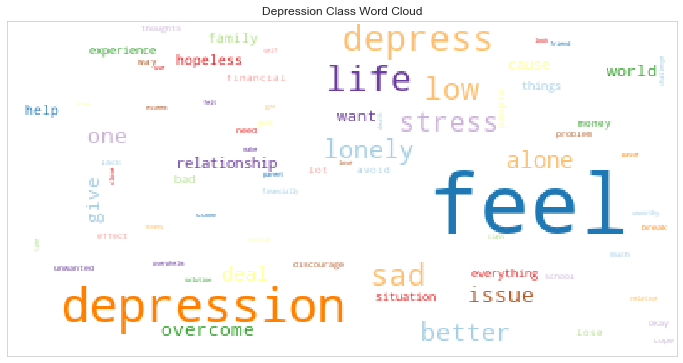

In [50]:
depression_class = train[train["label"] == "Depression"]['clean'].str.cat(sep = ",")
depression_word = (MyTextPlots().plot_word_cloud(depression_class, title='Depression Class Word Cloud',
                                              max_words=100, cmap='Paired', 
                                              figsize=(12, 12), savefig=True)
               )

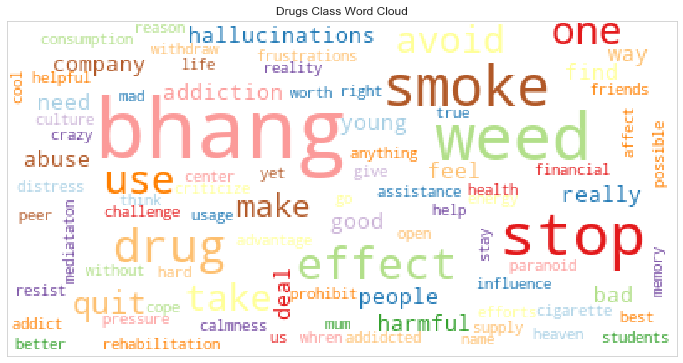

In [48]:
drugs_class = train[train["label"] == "Drugs"]['clean'].str.cat(sep = ",")
drugs_word = (MyTextPlots().plot_word_cloud(drugs_class, title='Drugs Class Word Cloud',
                                              max_words=100, cmap='Paired', 
                                              figsize=(12, 10), savefig=True)
               )

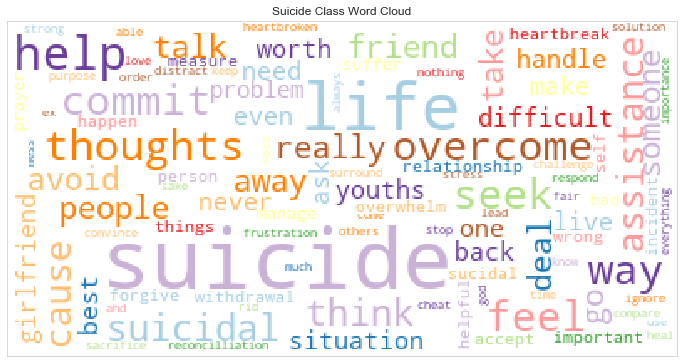

In [49]:
suicide_class = train[train["label"] == "Suicide"]['clean'].str.cat(sep = ",")
suicide_word = (MyTextPlots().plot_word_cloud(suicide_class, title='Suicide Class Word Cloud',
                                              max_words=100, cmap='Paired', 
                                              figsize=(12, 10), savefig=True)
               )

### machine learning

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
# from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer, PowerTransformer

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import  train_test_split, RandomizedSearchCV, RepeatedStratifiedKFold


from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced

In [127]:
X = train["clean"]
y = train["label"].factorize()[0]

def prepare_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y,
        test_size=0.2,
        stratify=y,
        random_state = 27
    )
    return X_train, X_test, y_train, y_test

def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(
        n_splits=5, 
        n_repeats=3, 
        random_state=27
    )
    
    # evaluate model
    scores = cross_validate(
        model, 
        X, 
        y, 
        scoring=('accuracy', 'neg_log_loss'), 
        cv=cv,
#         return_train_score=True, 
        n_jobs=-1
    )

    return scores

X_train, X_test, y_train, y_test = prepare_data(X, y)

In [101]:
vect = TfidfVectorizer(ngram_range=(1,2))

pipe = Pipeline([
    ('vect',TfidfVectorizer(ngram_range=(1,2)) ),
    ('svd', TruncatedSVD(algorithm='randomized', n_components=200)),
    ('model', XGBClassifier(n_estimators=500, learning_rate= 0.05, random_state = 27)),
])

scores = evaluate_model(X, y, pipe)

In [102]:
scores

{'fit_time': array([33.78499866, 34.28262591, 35.7883606 , 35.46119738, 34.46821761,
        33.97176075, 35.19866729, 35.70414209, 33.61635017, 34.02821445,
        34.64380097, 34.69345403, 28.87762666, 28.23545885, 27.03662467]),
 'score_time': array([0.05251384, 0.04848051, 0.05200243, 0.0510006 , 0.06801176,
        0.05600595, 0.05199957, 0.048558  , 0.04799914, 0.05543208,
        0.05000138, 0.04700184, 0.04231858, 0.03832173, 0.04686832]),
 'test_accuracy': array([0.81451613, 0.78861789, 0.81300813, 0.8699187 , 0.84552846,
        0.83064516, 0.84552846, 0.87804878, 0.85365854, 0.82113821,
        0.81451613, 0.82926829, 0.87804878, 0.84552846, 0.85365854]),
 'test_neg_log_loss': array([-0.88715203, -0.84819515, -0.57023696, -0.49018689, -0.6692777 ,
        -0.73008206, -0.6224409 , -0.50767149, -0.78312406, -0.80671975,
        -0.8144702 , -0.59239927, -0.46919108, -0.68538622, -0.69023771])}

In [97]:
scores['test_accuracy'].mean()

0.8306539033132267

In [136]:
pipeline = make_pipeline(
    TfidfVectorizer(ngram_range=(1,2)),
#     TruncatedSVD(algorithm='randomized', n_components=200)
    NearMiss(version=2),
#     XGBClassifier(n_estimators=500, learning_rate= 0.05, random_state = 27)
    LinearSVC(random_state=27)
)
pipeline.fit(X_train, y_train)

# Classify and report the results
print(classification_report_imbalanced(y_test, pipeline.predict(X_test)))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.82      0.85      0.85      0.83      0.69        71
          1       0.67      1.00      0.95      0.80      0.97      0.95        12
          2       0.43      0.46      0.93      0.44      0.65      0.41        13
          3       0.92      0.86      0.98      0.89      0.92      0.83        28

avg / total       0.82      0.81      0.90      0.81      0.85      0.72       124



In [146]:
pipeline = make_pipeline(
    TfidfVectorizer(ngram_range=(1,2)),
#     TruncatedSVD(algorithm='randomized', n_components=200),
#     NearMiss(version=2),
    RandomUnderSampler(),
    MultinomialNB()
#     XGBClassifier(n_estimators=500, learning_rate= 0.05, random_state = 27)
#     LinearSVC(random_state=27))
)
pipeline.fit(X_train, y_train)

# Classify and report the results
print(classification_report_imbalanced(y_test, pipeline.predict(X_test)))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.70      0.94      0.81      0.82      0.65        71
          1       0.67      1.00      0.95      0.80      0.97      0.95        12
          2       0.43      0.69      0.89      0.53      0.79      0.61        13
          3       0.78      0.89      0.93      0.83      0.91      0.82        28

avg / total       0.83      0.77      0.93      0.78      0.85      0.71       124



### make predictions

In [94]:
sub=pd.read_csv('data/SampleSubmission.csv')
sub.head()

,ID,Depression,Alcohol,Suicide,Drugs
0,02V56KMO,0,0,0,0
1,03BMGTOK,0,0,0,0
2,03LZVFM6,0,0,0,0
3,0EPULUM5,0,0,0,0
4,0GM4C5GD,0,0,0,0


In [147]:
pipe.fit(X_train,y_train)
pipe.fit(X,y)
# val_preds = pipe.predict_proba(X_test)
preds = pipe.predict_proba(test["clean"])

In [139]:
test.shape, preds.shape

((309, 8), (309, 4))

In [149]:
sub['Depression']=preds[:,0]
sub['Alcohol']=preds[:,3]
sub['Suicide']=preds[:,2]
sub['Drugs']=preds[:,1]

In [151]:
sub.to_csv("submissions/first_MultinomialNB.csv", index=None)

In [152]:
sub.head()

,ID,Depression,Alcohol,Suicide,Drugs
0,02V56KMO,0.984814,0.011805,0.001753,0.001628
1,03BMGTOK,0.998563,0.000495,0.000231,0.000712
2,03LZVFM6,0.998581,0.001070,0.000085,0.000264
3,0EPULUM5,0.997792,0.000280,0.000997,0.000930
4,0GM4C5GD,0.020618,0.203992,0.006708,0.768681
